In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/transform/transformed_data.csv')

df_tst = pd.read_csv('../data/transform/transformed_data_test.csv')

In [2]:
cols_to_remove = ['result_match', 'match_api_id', 'season', 'date', 'away_team', 'home_team', 'away_team_goal', 'home_team_goal', 'away_possession', 'home_shoton', 'home_possession', 'away_shoton',]

In [3]:
# Splitting the original dataset
X = df.drop(cols_to_remove, axis=1)
y = df['result_match']
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_full = XGBClassifier(random_state=42, enable_categorical=True)

# Train the model on the full feature set
xgb_full.fit(X_train_full, y_train)

# Predictions and evaluation on the full feature set
y_pred_full = xgb_full.predict(X_test_full)
accuracy_full = f1_score(y_test, y_pred_full, average='weighted')

print(f'Base line accuracy: {accuracy_full}')

Base line accuracy: 0.48497368283301456


In [4]:
df_tst_dropped = df_tst.drop(cols_to_remove, axis=1)

In [5]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# iterative_imputer = IterativeImputer()
# df_iterative_imputed = iterative_imputer.fit_transform(X)

# df_iterative_imputed = pd.DataFrame(df_iterative_imputed, columns=X.columns)

In [6]:
# X_train_full, X_test_full, y_train, y_test = train_test_split(df_iterative_imputed, y, test_size=0.2, random_state=42)

# xgb_full = XGBClassifier(random_state=42, enable_categorical=True)

# xgb_full.fit(X_train_full, y_train)

# y_pred_full = xgb_full.predict(X_test_full)
# accuracy_full = f1_score(y_test, y_pred_full, average='weighted')

# print(f'Base line accuracy: {accuracy_full}')

In [7]:
# df_ = df_iterative_imputed.copy()

In [8]:
# df_.info()

In [9]:
# List of player positions for which we have ratings
player_positions = range(1, 12)

# Calculate the difference from the average for each player
for position in player_positions:
    home_player_col = f'player_rating_home_player_{position}'
    away_player_col = f'player_rating_away_player_{position}'
    
    # Create new features for home and away players
    X[f'diff_player_{position}'] = X[home_player_col] - X[away_player_col]
    df_tst_dropped[f'diff_player_{position}'] = df_tst_dropped[home_player_col] - df_tst_dropped[away_player_col]
    # data_reduced.drop([home_player_col, away_player_col], axis=1, inplace=True)

# Display the dataframe to confirm the new features
X.filter(like='diff_player').columns

Index(['diff_player_1', 'diff_player_2', 'diff_player_3', 'diff_player_4',
       'diff_player_5', 'diff_player_6', 'diff_player_7', 'diff_player_8',
       'diff_player_9', 'diff_player_10', 'diff_player_11'],
      dtype='object')

In [10]:
df_ = X.copy()

In [11]:
away_players_7_11 = ['player_rating_away_player_6', 'player_rating_away_player_7', 'player_rating_away_player_8', 'player_rating_away_player_9', 'player_rating_away_player_10', 'player_rating_away_player_11']

df_['avg_away_rating_attack'] = df_[away_players_7_11].mean(axis=1).round(2)
df_tst_dropped['avg_away_rating_attack'] = df_tst_dropped[away_players_7_11].mean(axis=1).round(2)

home_players_7_11 = ['player_rating_home_player_6', 'player_rating_home_player_7', 'player_rating_home_player_8', 'player_rating_home_player_9',
            'player_rating_home_player_10', 'player_rating_home_player_11']

df_['avg_home_rating_attack'] = df_[home_players_7_11].mean(axis=1).round(2)
df_tst_dropped['avg_home_rating_attack'] = df_tst_dropped[home_players_7_11].mean(axis=1).round(2)

away_players_1_5 = ['player_rating_away_player_1', 'player_rating_away_player_2', 'player_rating_away_player_3',
            'player_rating_away_player_4', 'player_rating_away_player_5']

df_['avg_away_rating_defence'] = df_[away_players_1_5].mean(axis=1).round(2)
df_tst_dropped['avg_away_rating_defence'] = df_tst_dropped[away_players_1_5].mean(axis=1).round(2)

home_players_1_5 = ['player_rating_home_player_1', 'player_rating_home_player_2', 'player_rating_home_player_3',
            'player_rating_home_player_4', 'player_rating_home_player_5', 'player_rating_home_player_6']

df_['avg_home_rating_defence'] = df_[home_players_1_5].mean(axis=1).round(2)
df_tst_dropped['avg_home_rating_defence'] = df_tst_dropped[home_players_1_5].mean(axis=1).round(2)

In [12]:
df_['diff_avg_rating_attack'] = df_['avg_home_rating_attack'] - df_['avg_away_rating_attack']
df_['diff_avg_rating_defence'] = df_['avg_home_rating_defence']  - df_['avg_away_rating_defence']

df_.drop(['avg_home_rating_attack', 'avg_away_rating_attack', 'avg_home_rating_defence', 'avg_away_rating_defence'], inplace=True, axis=1)

df_tst_dropped['diff_avg_rating_attack'] = df_tst_dropped['avg_home_rating_attack'] - df_tst_dropped['avg_away_rating_attack']
df_tst_dropped['diff_avg_rating_defence'] = df_tst_dropped['avg_home_rating_defence']  - df_tst_dropped['avg_away_rating_defence']

df_tst_dropped.drop(['avg_home_rating_attack', 'avg_away_rating_attack', 'avg_home_rating_defence', 'avg_away_rating_defence'], inplace=True, axis=1)

In [13]:
player_cols= ['player_rating_away_player_6', 'player_rating_away_player_7', 'player_rating_away_player_8', 
 'player_rating_away_player_9', 'player_rating_away_player_10', 'player_rating_away_player_11',
 'player_rating_home_player_6', 'player_rating_home_player_7', 'player_rating_home_player_8',
 'player_rating_home_player_9', 'player_rating_home_player_10', 'player_rating_home_player_11',
 'player_rating_away_player_1', 'player_rating_away_player_2', 'player_rating_away_player_3',
 'player_rating_away_player_4', 'player_rating_away_player_5', 'player_rating_home_player_1', 
 'player_rating_home_player_2', 'player_rating_home_player_3','player_rating_home_player_4',
 'player_rating_home_player_5', 'player_rating_home_player_6'
]

df_ = df_.drop(player_cols, axis=1)
df_tst_dropped = df_tst_dropped.drop(player_cols, axis=1)

In [14]:
X_train_full, X_val_full, y_train, y_val = train_test_split(df_, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iterative_imputer = IterativeImputer()
df_iterative_imputed_train = iterative_imputer.fit_transform(X_train_full)
df_iterative_imputed_val = iterative_imputer.transform(X_val_full)
df_iterative_imputed_test = iterative_imputer.transform(df_tst_dropped)

df_iterative_imputed_train = pd.DataFrame(df_iterative_imputed_train, columns=X_train_full.columns)
df_iterative_imputed_val = pd.DataFrame(df_iterative_imputed_val, columns=X_val_full.columns)
df_iterative_imputed_test = pd.DataFrame(df_iterative_imputed_test, columns=df_tst_dropped.columns)

In [16]:
# X_train_full, X_test_full, y_train, y_test = train_test_split(df_, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_full = XGBClassifier(random_state=42)

# Train the model on the full feature set
xgb_full.fit(df_iterative_imputed_train, y_train)

# Predictions and evaluation on the full feature set
y_pred_full = xgb_full.predict(df_iterative_imputed_val)
accuracy_full = f1_score(y_val, y_pred_full, average='weighted')

accuracy_full

0.4988424600010256

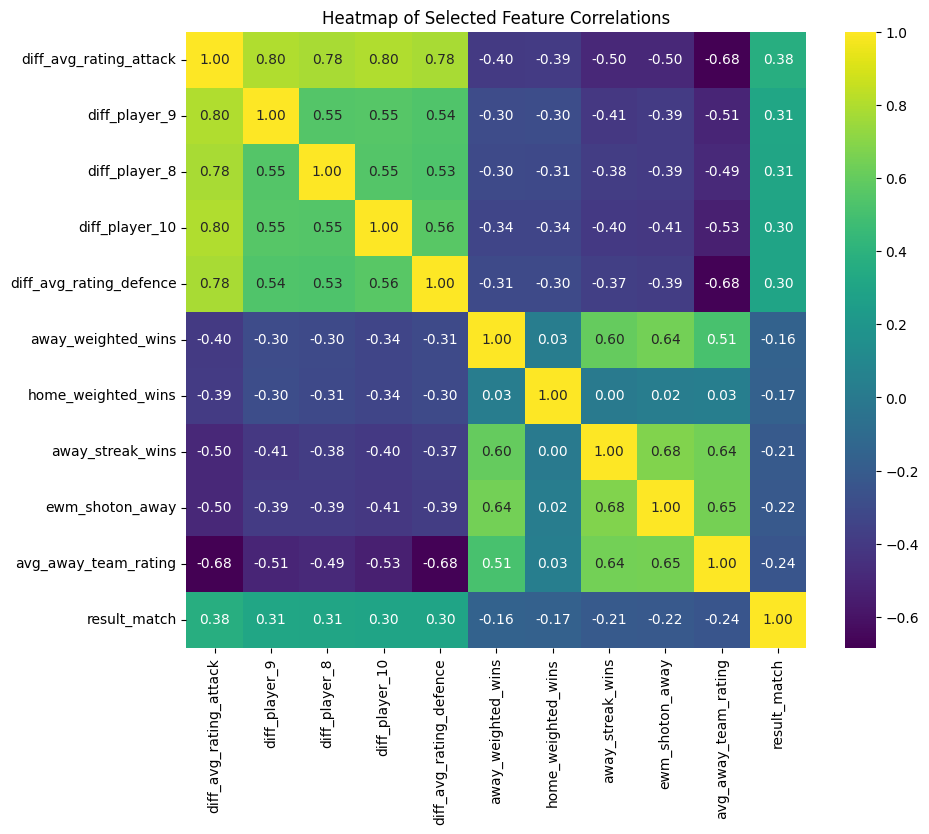

In [17]:
# Calculate the Pearson correlation matrix
correlation_matrix = df_.assign(result_match=y).corr()

# Extract the correlations with the target variable 'result_match'
correlations_with_target = correlation_matrix['result_match'].sort_values(ascending=False)

correlations_with_target

# Select the top 5 positively correlated and top 5 negatively correlated features (excluding the target itself)
top_positive_correlated_features = correlations_with_target.index[1:6].tolist()
top_negative_correlated_features = correlations_with_target.index[-5:].tolist()
selected_features = top_positive_correlated_features + top_negative_correlated_features

# Create a new dataframe with the selected features and the target variable
selected_data = df_.assign(result_match=y)[selected_features + ['result_match']]

# Create a heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title('Heatmap of Selected Feature Correlations')
plt.show()

In [18]:
import xgbfir

xgbfir.saveXgbFI(xgb_full, feature_names=X_train_full.columns, OutputXlsxFile='fir.xlsx')

file_path = 'fir.xlsx'
fir = pd.read_excel(file_path)

# Extracting top features based on different metrics
top_gain_features = fir.sort_values(by='Gain', ascending=False).head(10)
top_fscore_features = fir.sort_values(by='FScore', ascending=False).head(10)
top_wfscore_features = fir.sort_values(by='wFScore', ascending=False).head(10)
top_avg_gain_features = fir.sort_values(by='Average Gain', ascending=False).head(10)
top_expected_gain_features = fir.sort_values(by='Expected Gain', ascending=False).head(10)

# Displaying the top features
top_features_summary = {
    "Top Features by Gain": top_gain_features['Interaction'].values,
    "Top Features by FScore": top_fscore_features['Interaction'].values,
    "Top Features by wFScore": top_wfscore_features['Interaction'].values,
    "Top Features by Average Gain": top_avg_gain_features['Interaction'].values,
    "Top Features by Expected Gain": top_expected_gain_features['Interaction'].values
}

top_features_summary

{'Top Features by Gain': array(['diff_avg_rating_attack', 'ewm_shoton_home', 'ewm_away_team_goals',
        'ewm_away_team_goals_conceded', 'home_streak_wins',
        'ewm_home_team_goals', 'ewm_shoton_away', 'away_streak_wins',
        'ewm_home_team_goals_conceded', 'avg_away_team_rating'],
       dtype=object),
 'Top Features by FScore': array(['ewm_away_team_goals_conceded', 'ewm_away_team_goals',
        'ewm_home_team_goals', 'home_streak_wins', 'ewm_shoton_home',
        'ewm_home_team_goals_conceded', 'away_streak_wins',
        'ewm_shoton_away', 'avg_away_team_rating', 'avg_home_team_rating'],
       dtype=object),
 'Top Features by wFScore': array(['diff_avg_rating_attack', 'ewm_home_team_goals_conceded',
        'ewm_shoton_home', 'ewm_away_team_goals', 'ewm_home_team_goals',
        'avg_away_team_rating', 'ewm_away_team_goals_conceded',
        'home_streak_wins', 'ewm_shoton_away', 'away_streak_wins'],
       dtype=object),
 'Top Features by Average Gain': array(['diff_

In [19]:
# Load the data from the "Interaction Depth 1" and "Interaction Depth 2" sheets
interaction_depth_1 = pd.read_excel(file_path, sheet_name='Interaction Depth 1')
interaction_depth_2 = pd.read_excel(file_path, sheet_name='Interaction Depth 2')

# Display the first few rows of each sheet to understand their structure
interaction_depth_1_head = interaction_depth_1.sort_values('Average Rank', ascending=False).head(20)
interaction_depth_2_head = interaction_depth_2.sort_values('Average Rank', ascending=False).head(20)

interaction_depth_1_head

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
96,ewm_home_team_goals|stage,47.441138,15,0.892261,0.059484,3.162743,2.948941,97,80,91,90,78,94,88.333333,51.733333,3.733333
77,ewm_away_team_goals_conceded|home_weighted_wins,53.261872,19,0.550397,0.028968,2.803256,1.652446,78,50,97,98,94,100,86.166667,51.631579,4.368421
75,home_streak_wins|home_weighted_wins,53.423750,19,0.890755,0.046882,2.811776,2.800195,76,49,92,95,93,95,83.333333,54.000000,3.421053
74,away_weighted_wins|points_home,53.860005,17,0.890625,0.052390,3.168236,2.447048,75,64,93,92,77,97,83.000000,51.058824,3.882353
89,diff_player_11|ewm_home_team_goals,49.205670,16,1.350299,0.084394,3.075354,4.313775,90,74,83,80,81,88,82.666667,52.750000,4.562500
62,diff_player_11|ewm_shoton_home,60.160891,18,0.502855,0.027936,3.342272,2.021208,63,56,99,99,67,98,80.333333,51.722222,3.666667
81,ewm_away_team_goals|points_home,52.240693,13,0.804290,0.061868,4.018515,4.046345,82,92,94,89,32,90,79.833333,23.076923,3.923077
80,ewm_away_team_goals|points_away,52.468946,19,1.387727,0.073038,2.761523,5.639531,81,51,80,84,97,81,79.000000,39.315789,3.526316
94,away_streak_wins|away_weighted_wins,47.704891,11,0.936048,0.085095,4.336808,4.422323,95,97,90,79,22,87,78.333333,36.727273,4.363636
66,diff_player_8|ewm_away_team_goals_conceded,58.924010,20,1.041084,0.052054,2.946201,3.457612,67,38,87,93,89,93,77.833333,48.250000,3.600000


In [20]:
interaction_depth_2_head

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
97,diff_player_1|ewm_home_team_goals|ewm_home_tea...,30.106596,4,0.062869,0.015717,7.526649,0.454777,98,73,99,97,57,99,87.166667,31.000000,3.750000
86,avg_away_team_rating|diff_player_9|ewm_shoton_...,31.257120,6,0.077526,0.012921,5.209520,0.485408,87,47,95,99,92,98,86.333333,50.833333,4.166667
87,diff_player_9|ewm_away_team_goals|home_streak_...,31.223365,5,0.071279,0.014256,6.244673,0.629174,88,64,96,98,74,96,86.000000,41.800000,4.600000
88,diff_player_9|ewm_away_team_goals_conceded|hom...,31.209075,6,0.105231,0.017538,5.201512,0.580549,89,48,92,96,93,97,85.833333,35.666667,2.666667
95,diff_avg_rating_attack|ewm_away_team_goals|ewm...,30.537079,3,0.069800,0.023267,10.179026,1.310716,96,86,97,94,42,90,84.166667,27.666667,3.666667
89,diff_player_8|ewm_away_team_goals|ewm_away_tea...,30.953996,8,0.058679,0.007335,3.869249,0.239730,90,14,100,100,98,100,83.666667,57.875000,3.250000
92,away_weighted_wins|ewm_away_team_goals|ewm_sho...,30.675588,4,0.093335,0.023334,7.668897,0.759433,93,72,93,93,55,95,83.500000,24.250000,4.000000
98,ewm_shoton_home|home_streak_wins|stage,29.819305,4,0.222140,0.055535,7.454826,2.070411,99,74,78,75,58,81,77.500000,30.000000,4.250000
71,ewm_away_team_goals_conceded|ewm_shoton_home|p...,33.510635,6,0.161352,0.026892,5.585106,0.808899,72,39,87,89,81,94,77.000000,16.500000,4.666667
56,ewm_shoton_away|ewm_shoton_away|points_home,36.142231,3,0.066929,0.022310,12.047410,0.833249,57,82,98,95,34,93,76.500000,12.666667,4.666667


In [21]:
X_train_full['home_weighted_wins'].describe()

count    2432.000000
mean       -9.183860
std        44.645177
min      -117.677614
25%       -31.437362
50%         2.975202
75%        23.728360
max        56.130275
Name: home_weighted_wins, dtype: float64

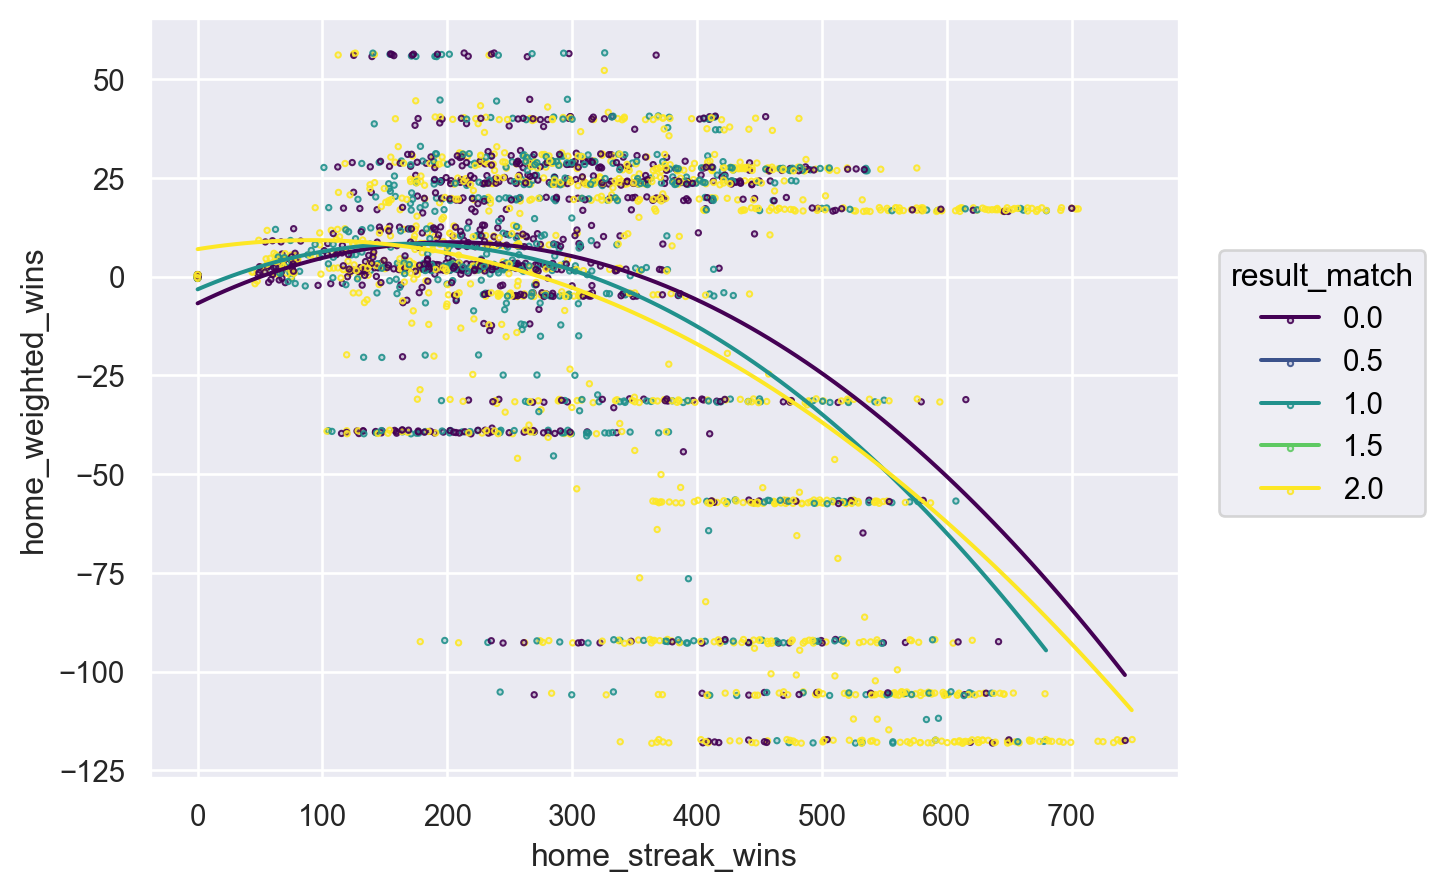

<Figure size 1200x800 with 0 Axes>

In [22]:
import seaborn.objects as so
fig = plt.figure(figsize=(12, 8))
(so.Plot(X_train_full.assign(result_match=y_train), x='home_streak_wins', y='home_weighted_wins',color='result_match')
 .add(so.Dots(alpha=.9, pointsize=2), so.Jitter(x=.7, y=1))
 .add(so.Line(), so.PolyFit())
 .scale(color='viridis')
 # .on(fig) # not required unless saving to image
 .plot()) # ditto


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel

# Initialize the XGBClassifier
xgb_full = XGBClassifier(random_state=42)

# Train the model on the full feature set
xgb_full.fit(df_iterative_imputed_train, y_train)

# Predictions and evaluation on the full feature set
y_pred_full = xgb_full.predict(df_iterative_imputed_val)
f1 = f1_score(y_val, y_pred_full, average='weighted')
print(f"F1 with full feature set: {f1}")

# Extracting feature importance
feature_importances = xgb_full.feature_importances_

# Store results
results = []

# Select the most important features
thresholds = sorted(feature_importances, reverse=True)

for thresh in set(thresholds):
    # Select features using threshold
    selection = SelectFromModel(xgb_full, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_full)

    # Train model
    selection_model = XGBClassifier(random_state=42)
    selection_model.fit(select_X_train, y_train)

    # Evaluate model
    select_X_test = selection.transform(X_val_full)
    y_pred = selection_model.predict(select_X_test)
    f1 = f1_score(y_val, y_pred, average='weighted')

    # Storing the results
    results.append({'threshold': thresh, 'n_features': select_X_train.shape[1], 'f1': f1})

# Sorting the results by accuracy
sorted_results = sorted(results, key=lambda x: x['f1'], reverse=True)

# Print the top 5 results
print("Top 5 feature selection results:")
for result in sorted_results[:5]:
    print(f"Threshold: {result['threshold']}, Number of Features: {result['n_features']}, F1: {result['f1']}")

# Sorting the results by F1 score and selecting the best one
best_result = max(results, key=lambda x: x['f1'])

# Extracting the best feature names
selection = SelectFromModel(xgb_full, threshold=best_result['threshold'], prefit=True)
best_features = X_train_full.columns[selection.get_support()]

# best_features now contains the names of the best set of features
# print(f"Best Feature Set: {list(best_features)}")

F1 with full feature set: 0.4988424600010256
Top 5 feature selection results:
Threshold: 0.03541291132569313, Number of Features: 22, F1: 0.49339746321731753
Threshold: 0.0, Number of Features: 28, F1: 0.49339746321731753
Threshold: 0.03971982002258301, Number of Features: 17, F1: 0.4910974247605571
Threshold: 0.0431254580616951, Number of Features: 9, F1: 0.4818567032354857
Threshold: 0.03775523230433464, Number of Features: 19, F1: 0.4806942895530467


In [30]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stage                         3040 non-null   int64  
 1   ewm_home_team_goals           3024 non-null   float64
 2   ewm_away_team_goals           3022 non-null   float64
 3   ewm_home_team_goals_conceded  3024 non-null   float64
 4   ewm_away_team_goals_conceded  3022 non-null   float64
 5   points_home                   3040 non-null   int64  
 6   points_away                   3040 non-null   int64  
 7   home_weighted_wins            3040 non-null   float64
 8   away_weighted_wins            3040 non-null   float64
 9   avg_home_team_rating          3040 non-null   float64
 10  avg_away_team_rating          3040 non-null   float64
 11  home_streak_wins              3040 non-null   float64
 12  away_streak_wins              3040 non-null   float64
 13  ewm

In [31]:
import os
output_dir = "../data/engeneering/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

df_iterative_imputed_train.to_csv(output_dir + 'X_train', index=False)
df_iterative_imputed_val.to_csv(output_dir + 'X_val', index=False)
df_iterative_imputed_test.to_csv(output_dir + 'X_test', index=False)

y_train.to_csv(output_dir + 'y_train', index=False)
y_val.to_csv(output_dir + 'y_val', index=False)
y_test.to_csv(output_dir + 'y_test', index=False)